Tutorial from https://lodev.org/cgtutor/filtering.html

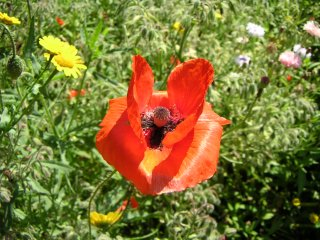

In [1]:
from PIL import Image
img = Image.open("flower.jpg")
img

In [36]:
import numpy as np


def conv(f, img=img):
    s = np.array(img)
    fi = np.stack([f for _ in range(3)], axis=2)
    c = np.zeros((s.shape[0]-f.shape[0]+1, s.shape[1]-f.shape[1]+1, 3))
    for j in range(c.shape[1]):
        for i in range(c.shape[0]):
            c[i,j,:] = np.sum(s[i:i+f.shape[0],j:j+f.shape[1],:] * fi, axis=(0,1))
    
    c[c < 0] = 0
    c[c > 255] = 255
    
    return Image.fromarray(c.astype(np.uint8))

def pool(func, shape=(2,2), img=img):
    s = np.array(img)
    c = np.zeros((s.shape[0]-shape[0]+1, s.shape[1]-shape[1]+1, 3))
    for j in range(c.shape[1]):
        for i in range(c.shape[0]):
            c[i,j,:] = func(s[i:i+shape[0],j:j+shape[1],:], axis=(0,1))
    
    c[c < 0] = 0
    c[c > 255] = 255
    
    return Image.fromarray(c.astype(np.uint8))

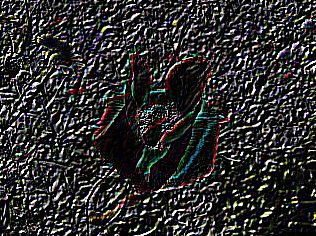

In [29]:
f1 = np.array(
    [
        [-1,  0,  0,  0,  0],
        [ 0, -2,  0,  0,  0],
        [ 0,  0,  6,  0,  0],
        [ 0,  0,  0, -2,  0],
        [ 0,  0,  0,  0, -1],
    ]
).T
conv(f1)

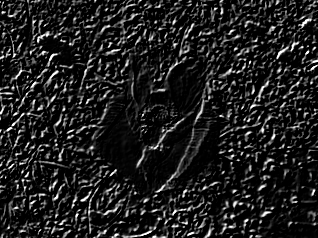

In [35]:
f2 = np.array([
    [+1, +1,  0],
    [+1,  0, -1],
    [ 0, -1, -1],
])
conv(-f2).convert('L')

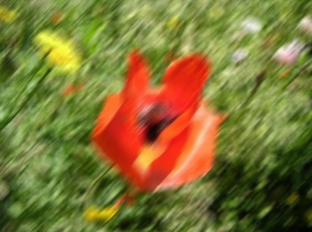

In [5]:
f2 = np.fliplr(np.eye(9))
conv(f2)

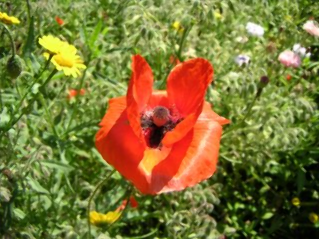

In [37]:
pool(np.median)

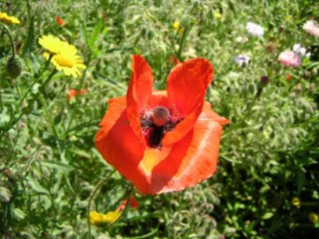

In [38]:
pool(np.mean)

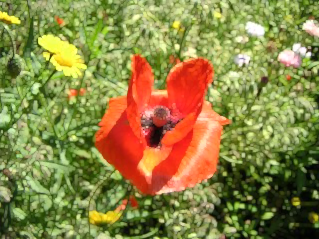

In [39]:
pool(np.amax)

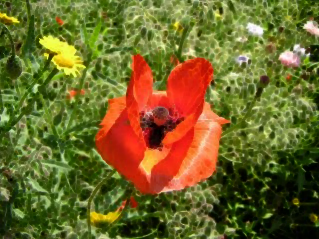

In [40]:
pool(np.amin)